In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("Set1")
import numpy as np

In [2]:
stdsaltelli5kp1 = pd.read_csv("data/saltelli5000std-star1.csv")
stdsaltelli5kp2 = pd.read_csv("data/saltelli5000std-star2.csv")
stdsaltelli5kp3 = pd.read_csv("data/saltelli5000std-star3.csv")

sobolsets = [stdsaltelli5kp1 ,  stdsaltelli5kp2 , stdsaltelli5kp3 ]  


In [3]:
def rnmvarsetindx(dataset):
    dataset["Var"][0] = "N"
    dataset["Var"][1] = "n"
    dataset.set_index("Var", inplace = True)
    return(dataset)

listmap = lambda fn,data: list(map(fn,data))

listmap(rnmvarsetindx,sobolsets);

/home/marcelovmaciel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/marcelovmaciel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
stdsaltelli5kp3.head()

S1   S1_conf        ST   ST_conf
Var                                        
N    0.003547  0.006441  0.021785  0.004212
n    0.182873  0.025405  0.240052  0.016183
p    0.053821  0.013521  0.112203  0.008604
σ    0.513162  0.041745  0.616044  0.030817
ρ    0.093711  0.016003  0.178366  0.011720

In [5]:
listmap(lambda x: print(x.to_latex()),[stdsaltelli5kp1 , 
                        stdsaltelli5kp2 ,
                        stdsaltelli5kp3 ])

\begin{tabular}{lrrrr}
\toprule
{} &        S1 &   S1\_conf &        ST &   ST\_conf \\
Var      &           &           &           &           \\
\midrule
N        &  0.005239 &  0.006541 &  0.022070 &  0.002834 \\
n        &  0.187386 &  0.026708 &  0.234778 &  0.014641 \\
p        &  0.063925 &  0.013259 &  0.116300 &  0.009839 \\
σ        &  0.461952 &  0.029550 &  0.576792 &  0.030179 \\
ρ        &  0.129436 &  0.017952 &  0.240982 &  0.016418 \\
p\_intran &  0.000789 &  0.003783 &  0.011597 &  0.001665 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrr}
\toprule
{} &        S1 &   S1\_conf &        ST &   ST\_conf \\
Var      &           &           &           &           \\
\midrule
N        &  0.003789 &  0.006132 &  0.018755 &  0.003308 \\
n        &  0.189835 &  0.023522 &  0.257400 &  0.018546 \\
p        &  0.035737 &  0.011525 &  0.084640 &  0.007704 \\
σ        &  0.556095 &  0.040256 &  0.655125 &  0.033731 \\
ρ        &  0.067517 &  0.016010 &  0.154048 &  0.013454 \

[None, None, None]

In [6]:
stdsaltelli5kp1.head()

S1   S1_conf        ST   ST_conf
Var                                        
N    0.005239  0.006541  0.022070  0.002834
n    0.187386  0.026708  0.234778  0.014641
p    0.063925  0.013259  0.116300  0.009839
σ    0.461952  0.029550  0.576792  0.030179
ρ    0.129436  0.017952  0.240982  0.016418

In [7]:
def plot_sobol(data, imagename:str, imagetitle:str):
    indices_5000 = data[['S1','ST']]
    err_5000 = data[['S1_conf','ST_conf']]
    fig, ax = plt.subplots(1, dpi = 200)
    indices_5000.plot.bar(yerr=err_5000.values.T,ax=ax)
    plt.xticks(rotation = "horizontal",  fontsize = 14, 
               color = "gray", fontweight= "bold")
    ax.set_xlabel(" ")
    ax.set_title(imagetitle, fontsize = 18, 
                 color = "gray", fontweight= "bold")

    plt.savefig(imagename, dpi = 200)
    plt.show()

In [8]:
imagenames = ["img/sobolpstar1.png", "img/sobolpstar2.png", "img/sobolpstar3.png" ]
imagetitles = ["Sobol Indexes (p*)", "Sobol Indexes (p**)", "Sobol Indexes (p***)"]

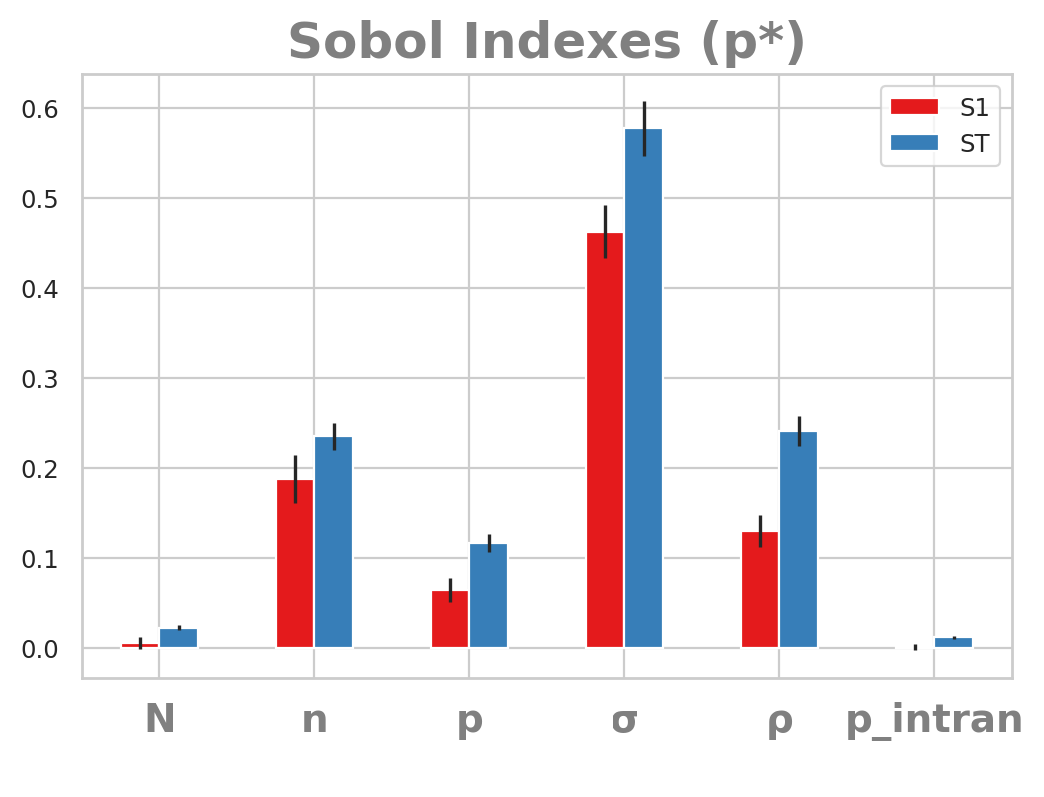

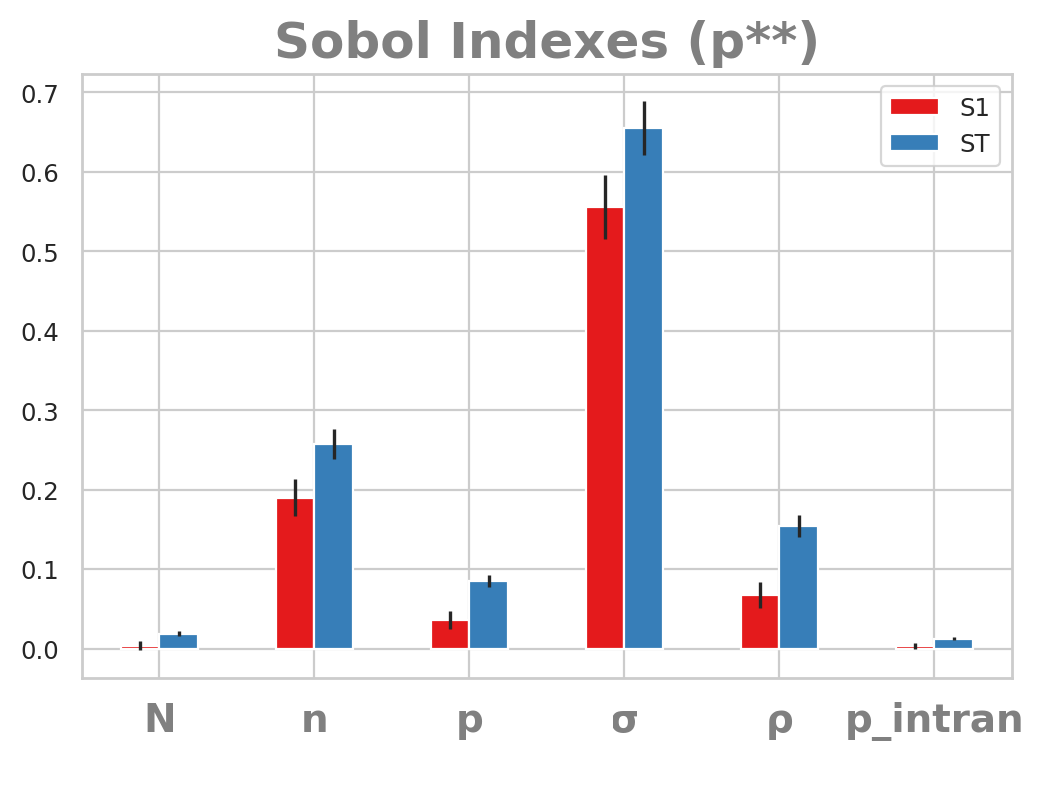

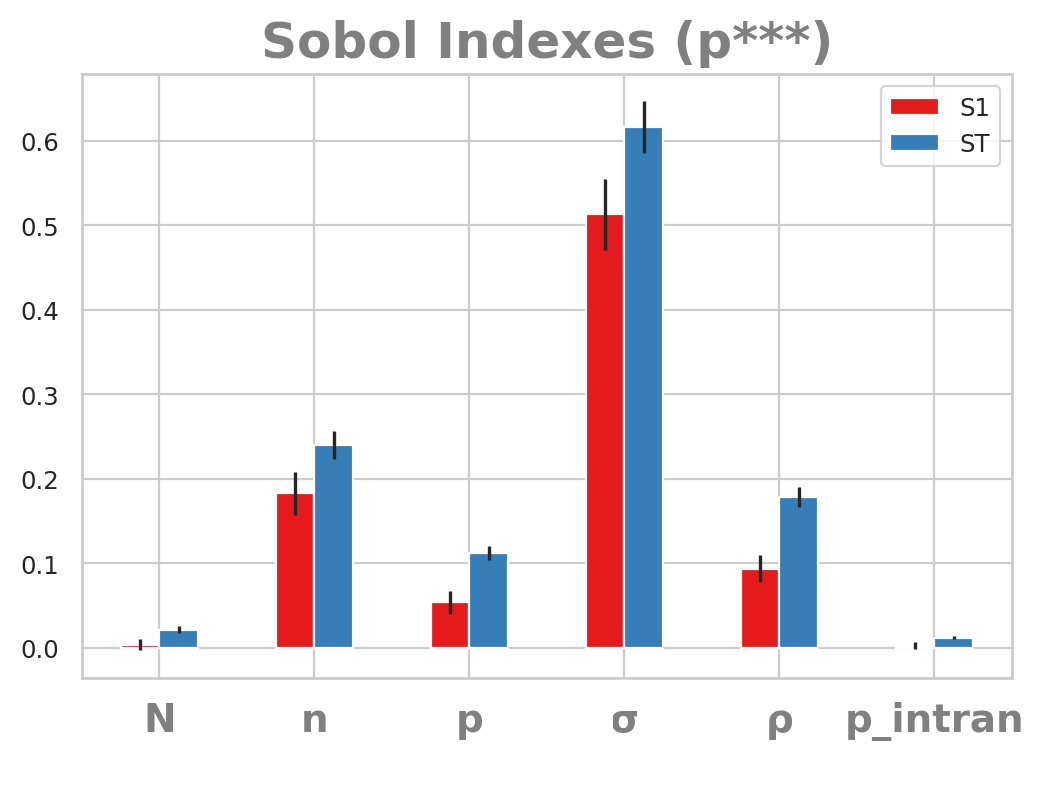

[None, None, None]

In [9]:
listmap(lambda x: plot_sobol(*x), zip(sobolsets,imagenames,imagetitles))

In [18]:
df_5k6params = pd.read_csv("data/5kparamsresults.csv")

In [15]:
stds_imagenames = ["img/initstd.png", "img/Ystd*.png",
                   "img/Ystd**.png", "img/Ystd***.png" ]

stds_columns = [df_5k6params["Initstd"], df_5k6params["Ystd★"],
               df_5k6params["Ystd★★"], df_5k6params["Ystd★★★"]]

stds_titles = [" System Initial conditions ", 
               "System's final states for p★",
               " System's final states for p★★",
               " System's final states for p★★★"]


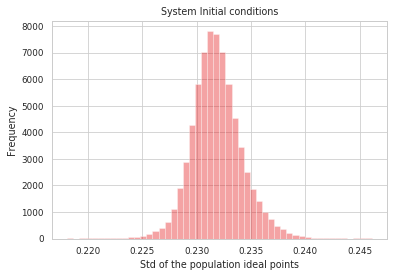

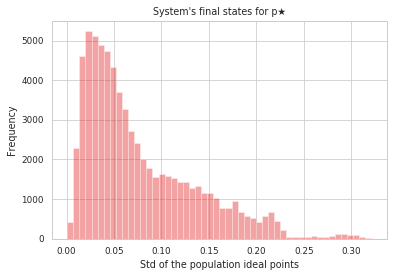

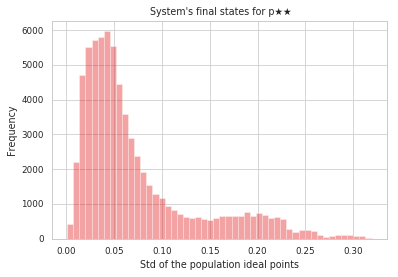

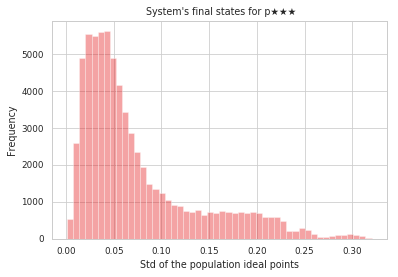

[None, None, None, None]

In [16]:
def plotdist(dfcolumn, imagename, title):
    sns.distplot(dfcolumn, kde = False)
    plt.title(title)
    plt.ylabel("Frequency")
    plt.xlabel("Std of the population ideal points")
    plt.savefig(imagename, dpi = 200)
    plt.show()



listmap(lambda x: plotdist(*x), zip(stds_columns,stds_imagenames, stds_titles))

In [28]:
df_5k6params.head()

N  n_issues         p         σ         ρ  p_intran     Ystd★    Ystd★★  \
0  1489         2  0.561514  0.341611  0.028027  0.272168  0.071097  0.073172   
1   707         2  0.561514  0.341611  0.028027  0.272168  0.073609  0.073814   
2  1489         9  0.561514  0.341611  0.028027  0.272168  0.021083  0.019613   
3  1489         2  0.545869  0.341611  0.028027  0.272168  0.069520  0.072758   
4  1489         2  0.561514  0.043975  0.028027  0.272168  0.197124  0.177665   

    Ystd★★★   Initstd  
0  0.072356  0.234296  
1  0.073952  0.232200  
2  0.021363  0.236087  
3  0.070447  0.230244  
4  0.167963  0.236824

In [10]:
df_5k6params.columns.values[0:6]

array(['N', 'n_issues', 'p', 'σ', 'ρ', 'p_intran'], dtype=object)

In [19]:
def saveregressionplot(df,xvar,yvar, whichp):

    fig1, ax1 = plt.subplots(1, dpi = 200)
    sns.regplot(xvar, df[yvar], data = df, 
                scatter_kws= {'alpha':0.2, 's':4, 'color':'gray'},
                color='k',  fit_reg=False)
    ax1.set_xlabel(xvar,  fontsize = 12, 
                   color = "gray", fontweight= "bold")
    ax1.set_ylabel(yvar,  fontsize = 12, 
                   color = "gray", fontweight= "bold")
    plt.savefig("img/regression{}{}.png".format(whichp,xvar), dpi = 200)
    plt.show()

def dfregplots(df, yvar, whichp):
    for column in list(df.columns.values[0:6]):
        saveregressionplot(df,column, yvar, whichp)

    

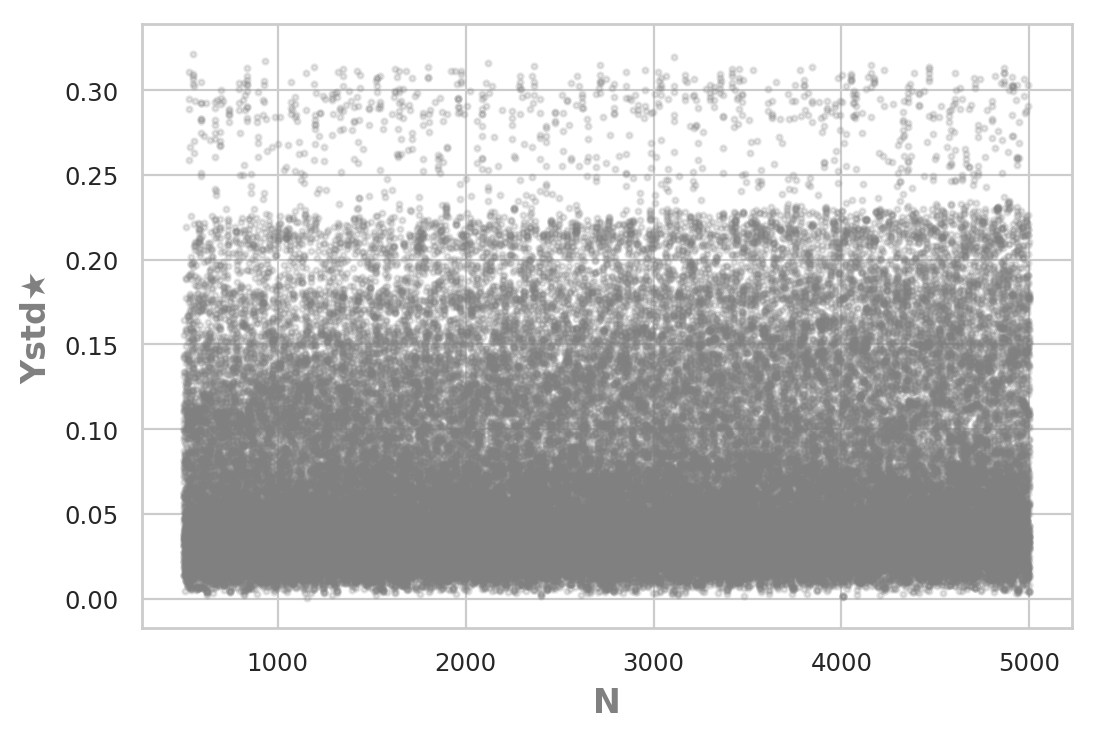

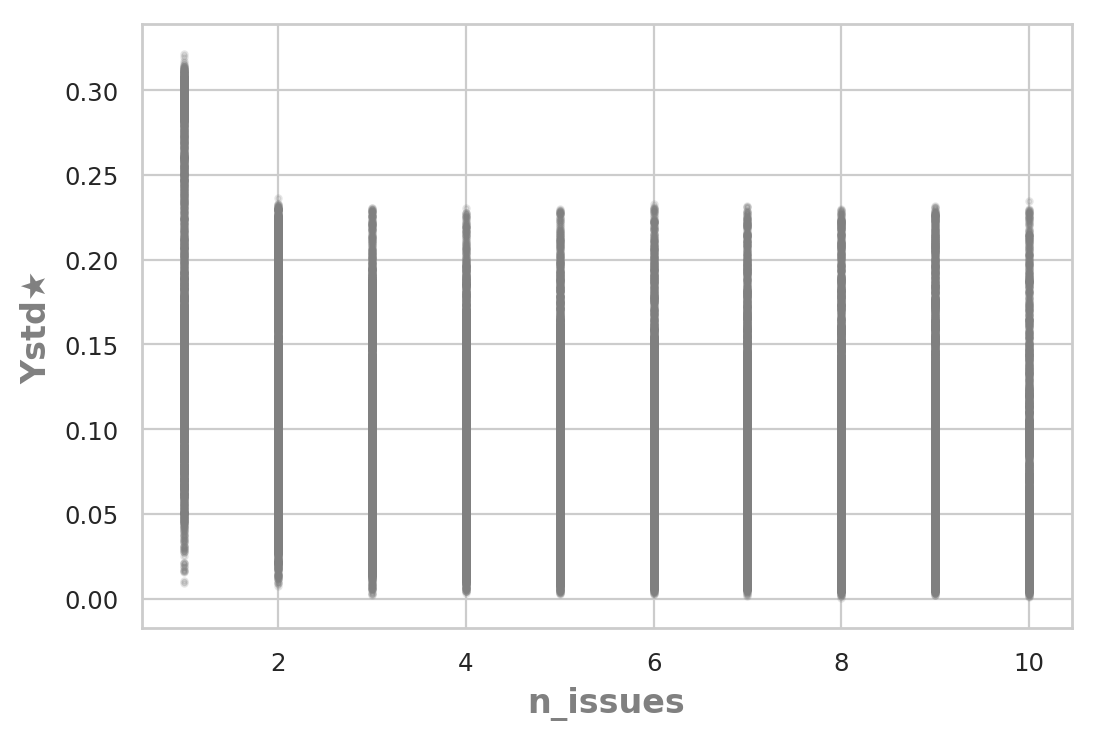

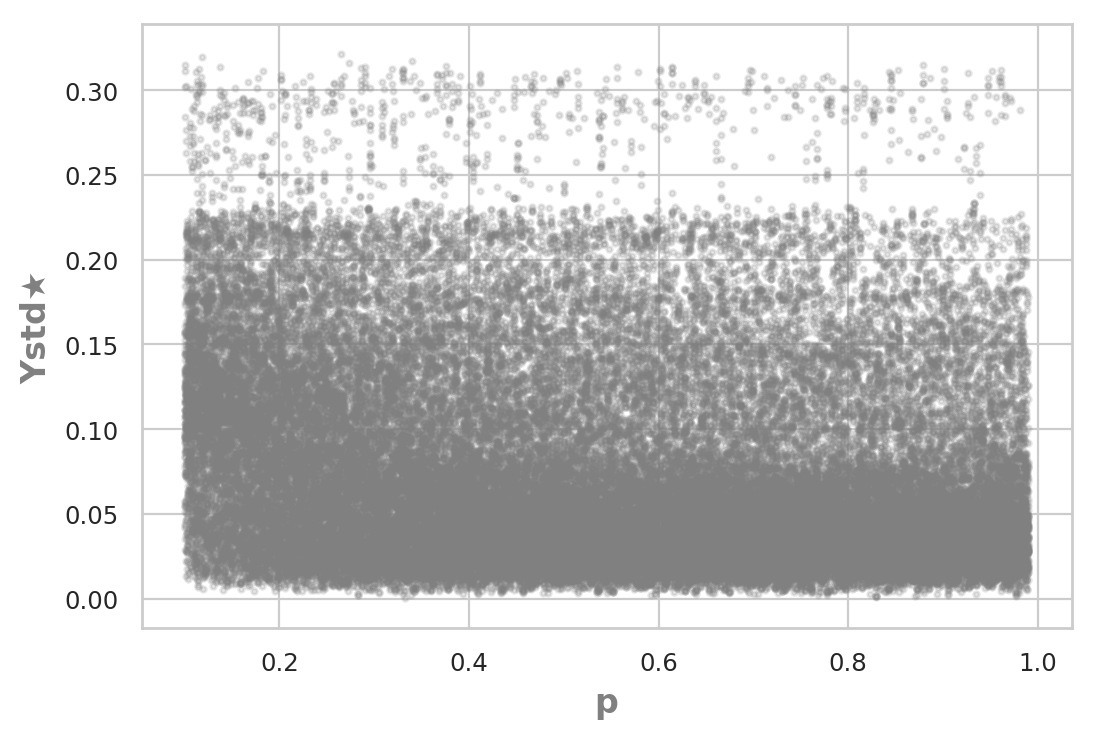

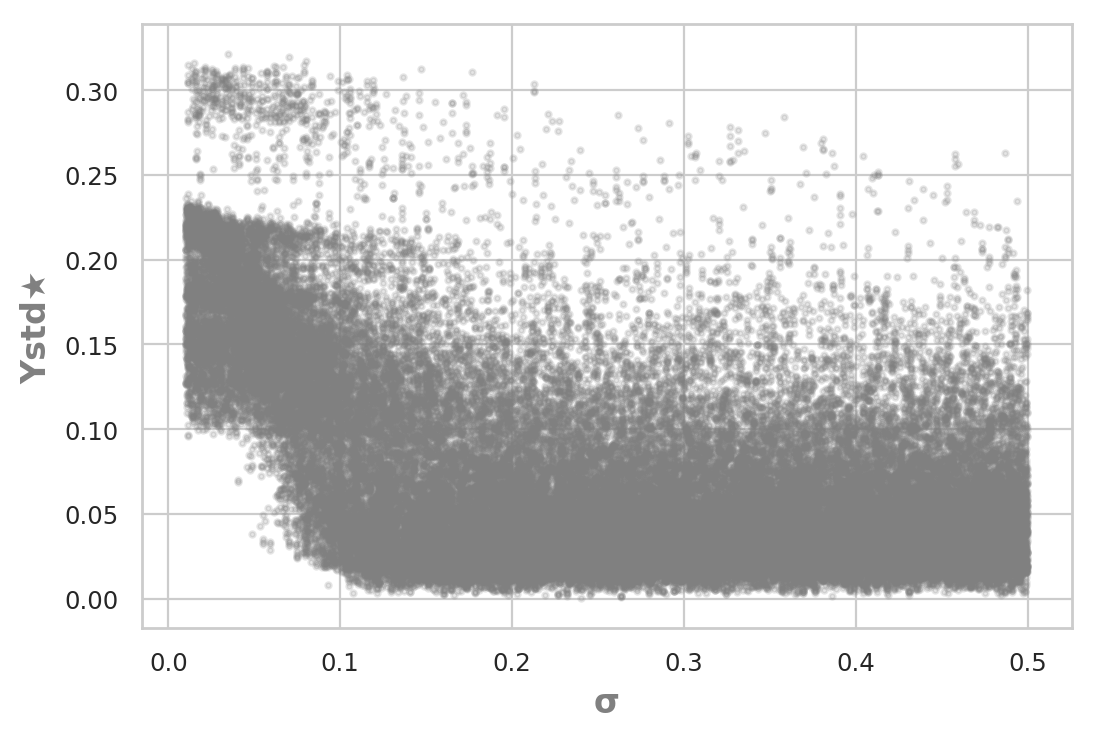

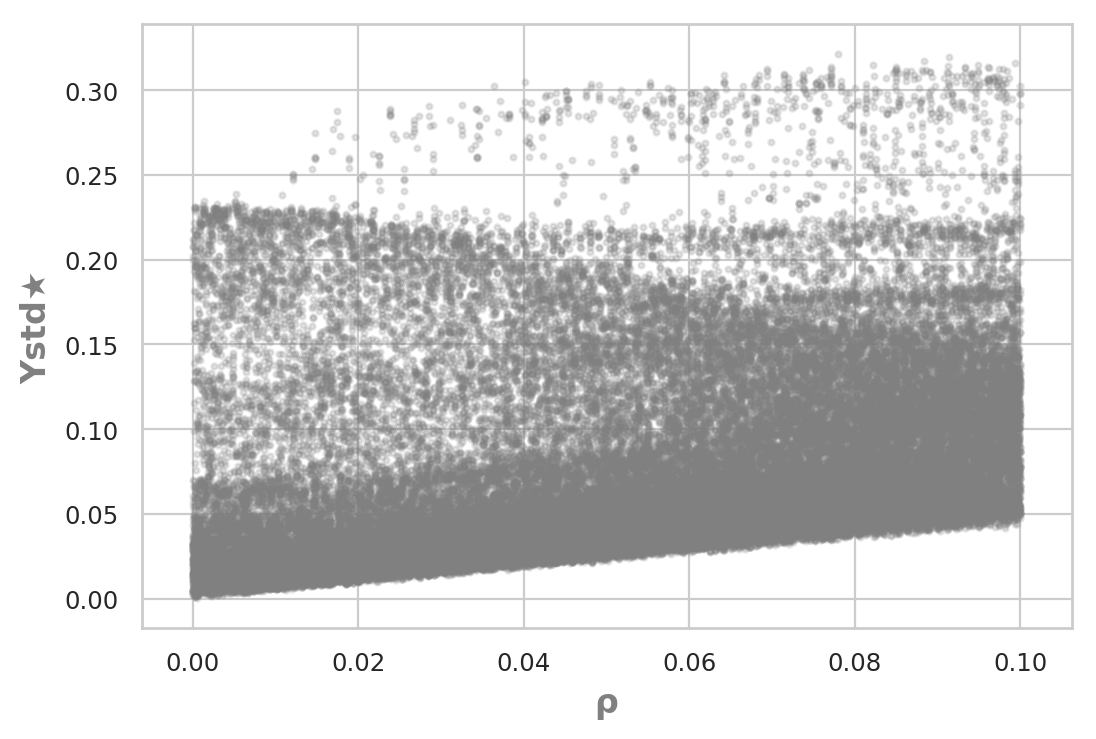

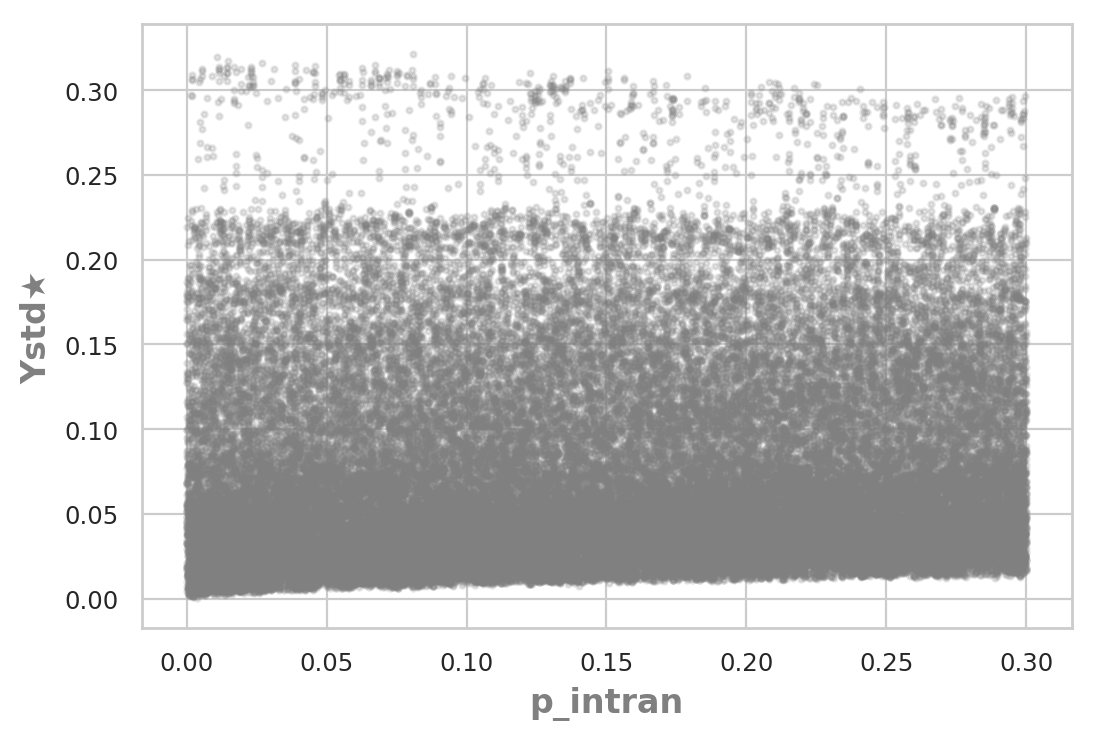

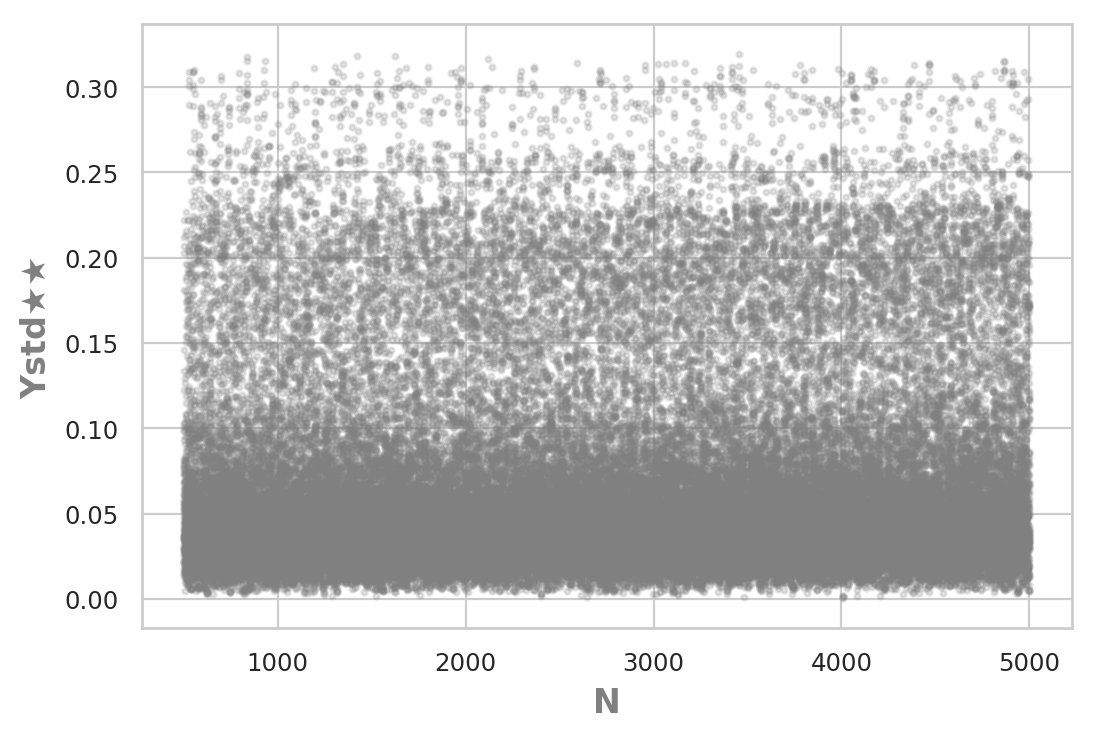

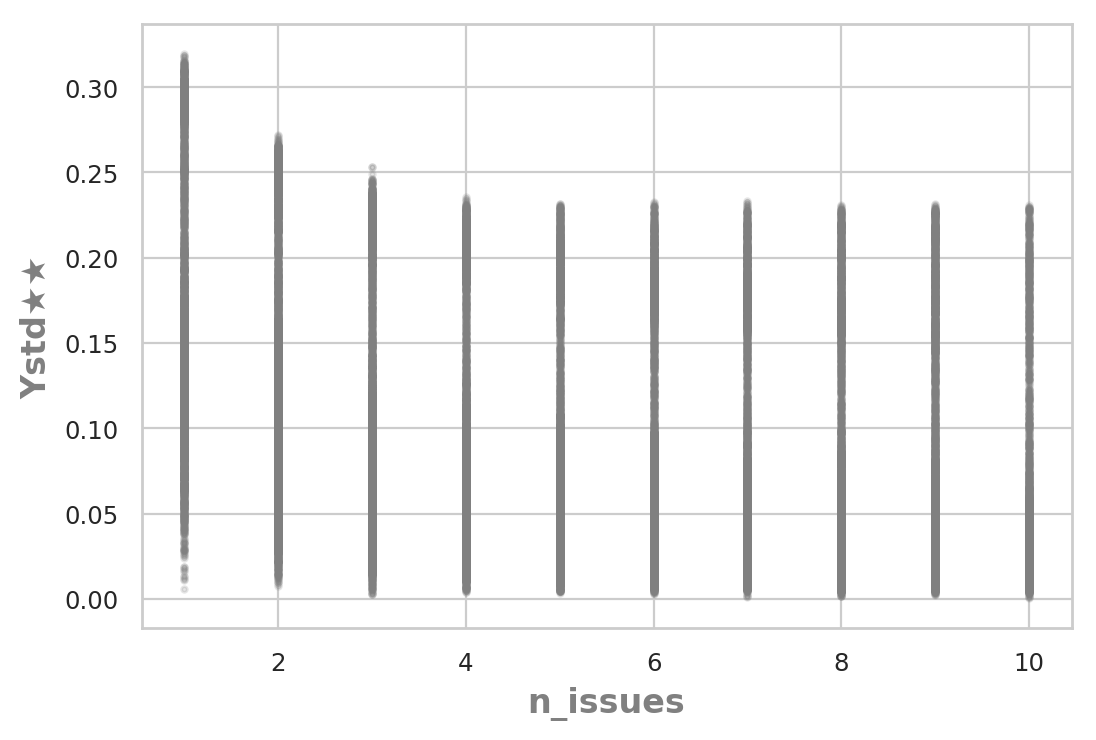

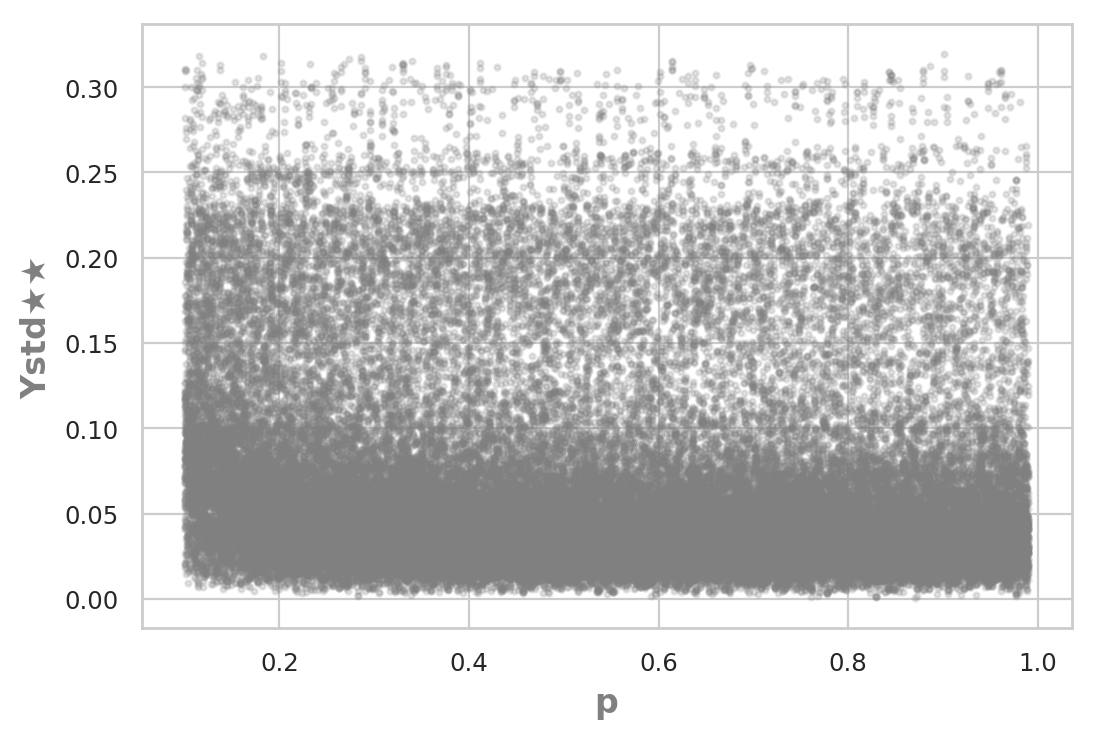

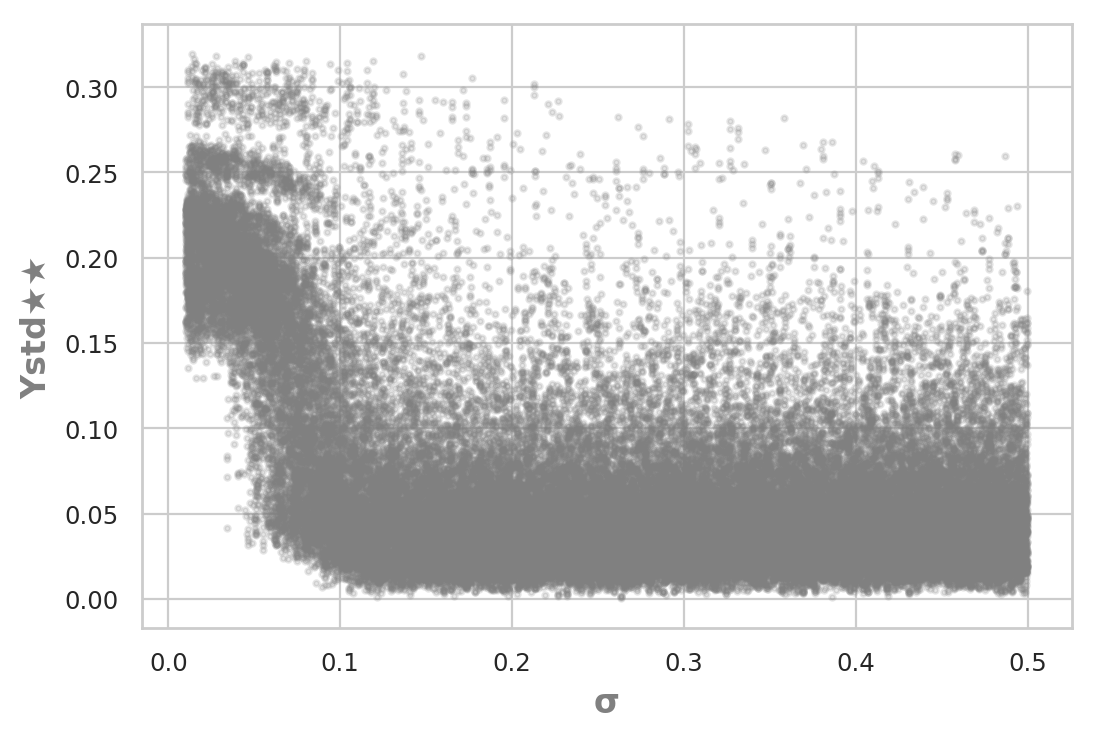

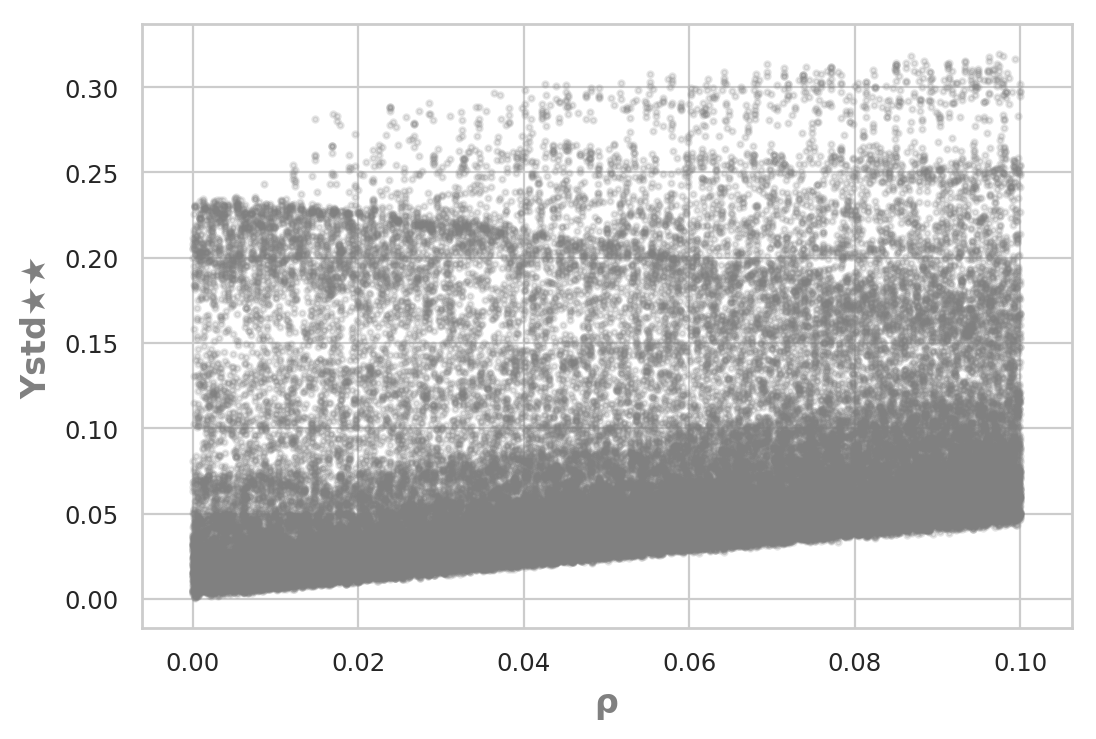

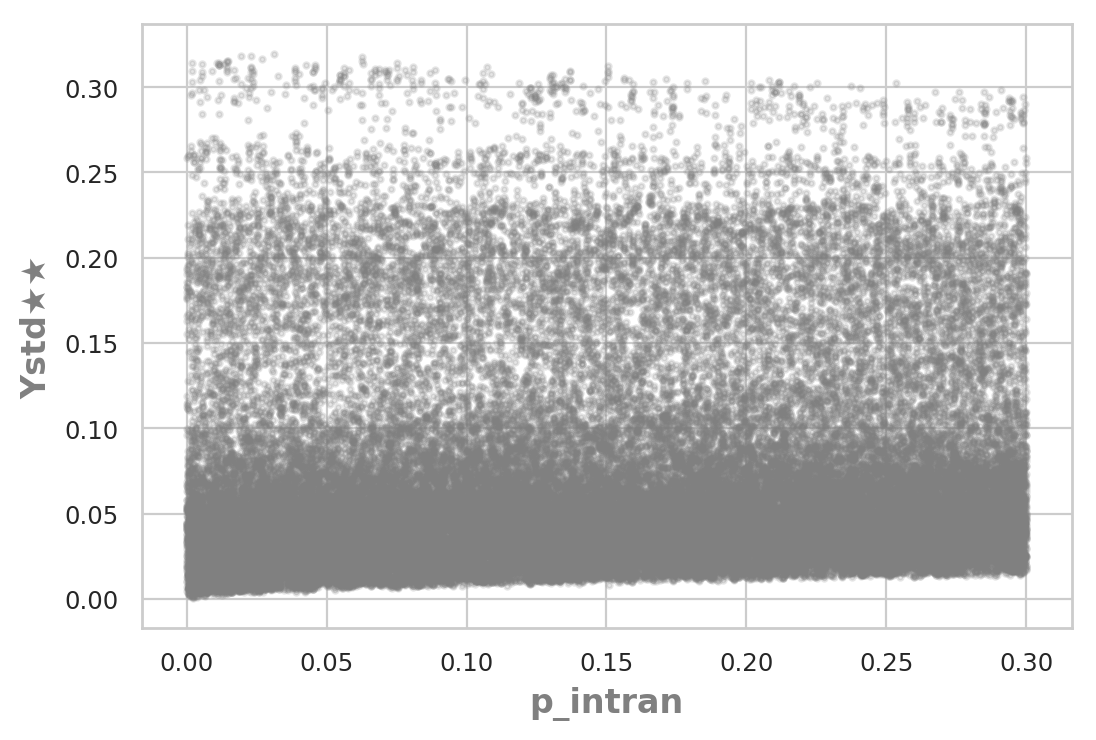

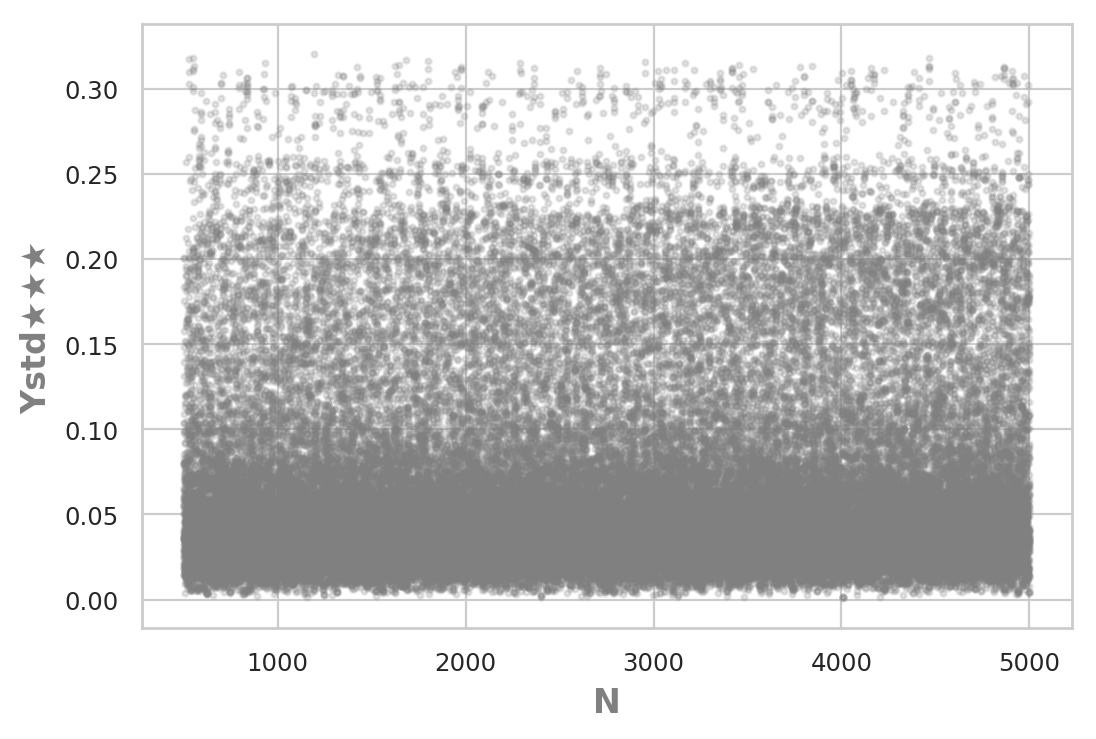

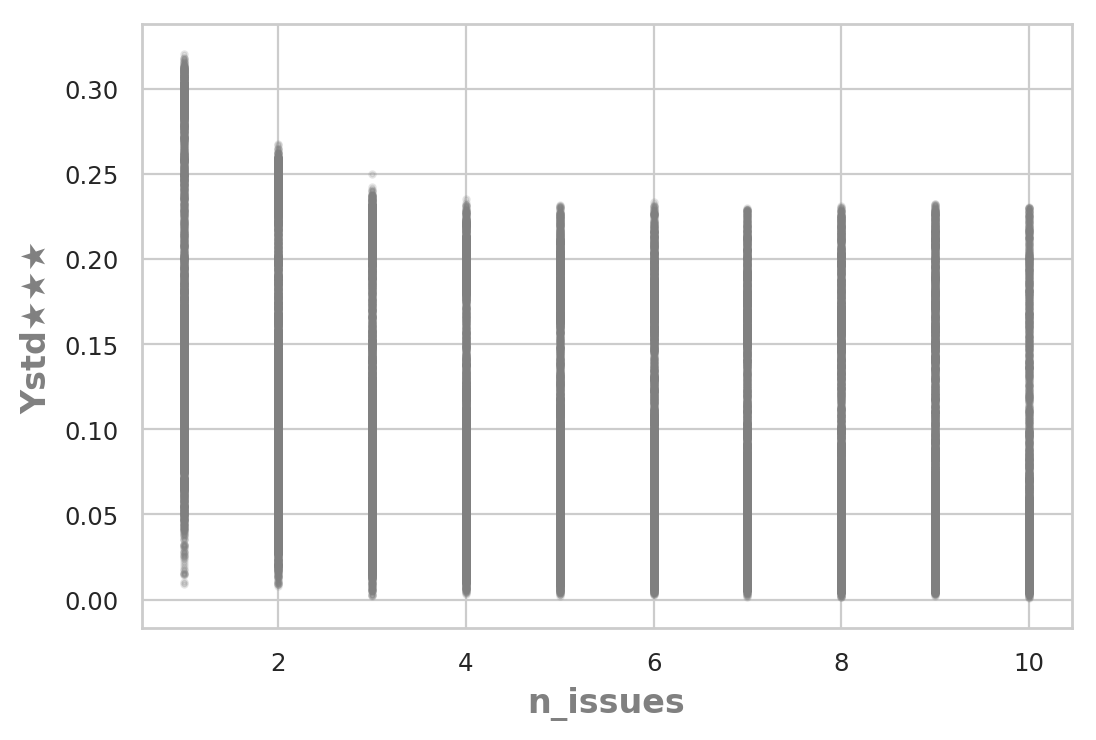

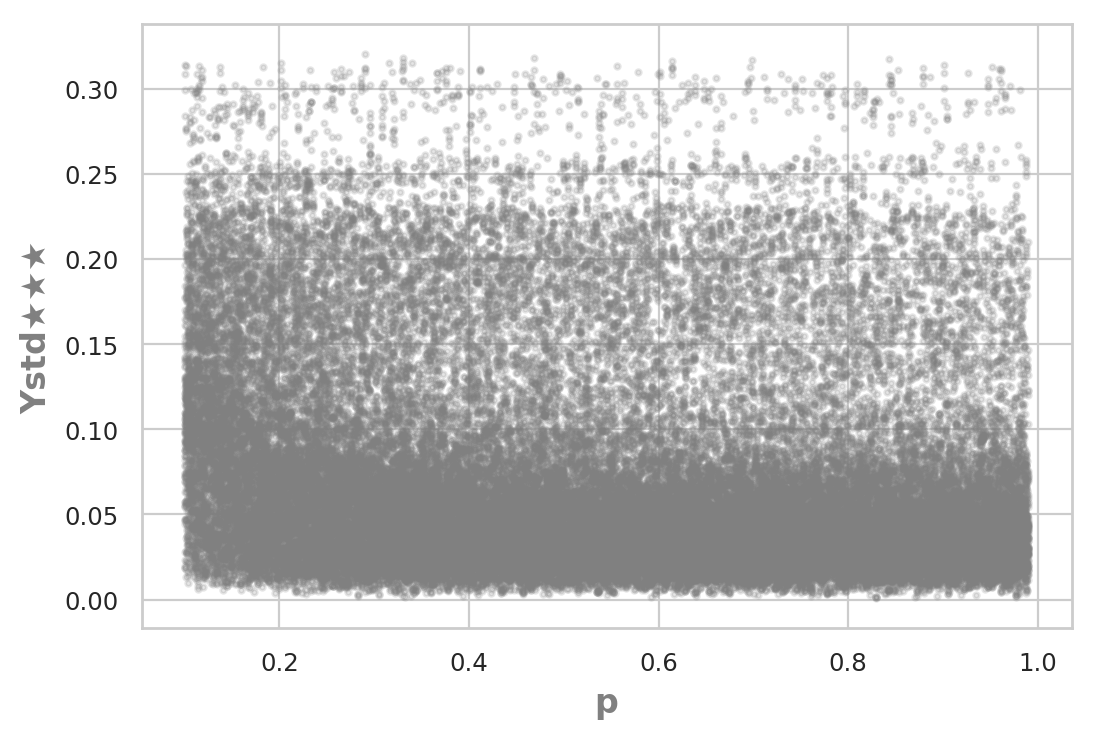

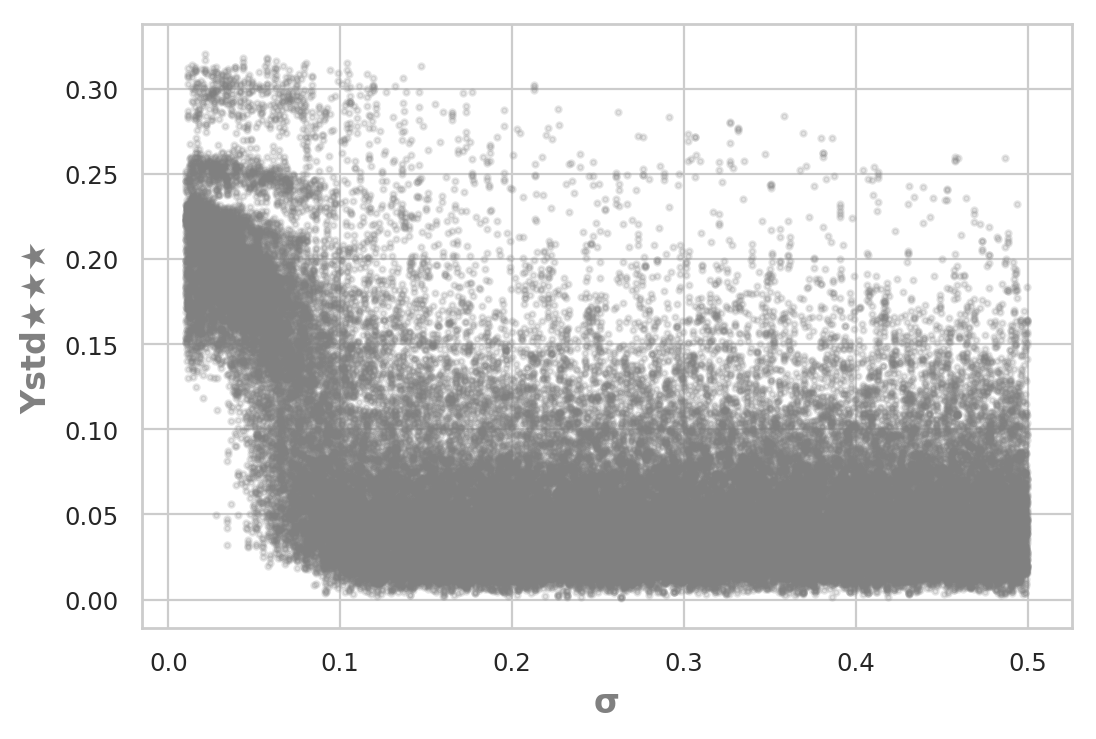

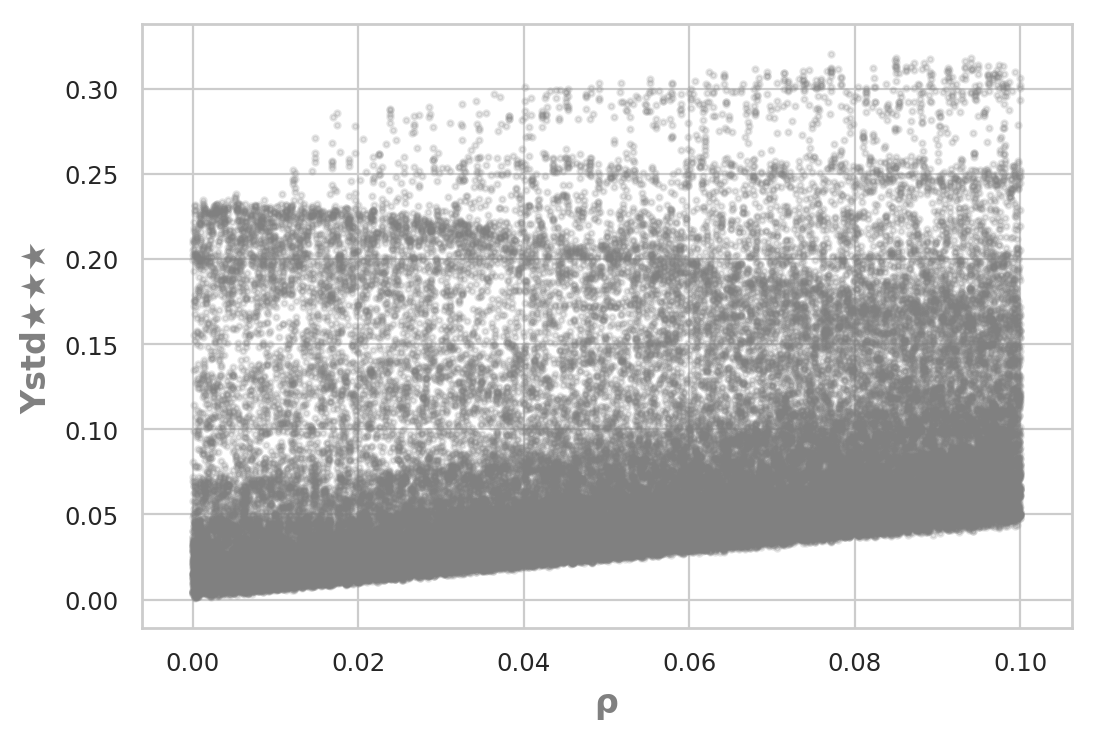

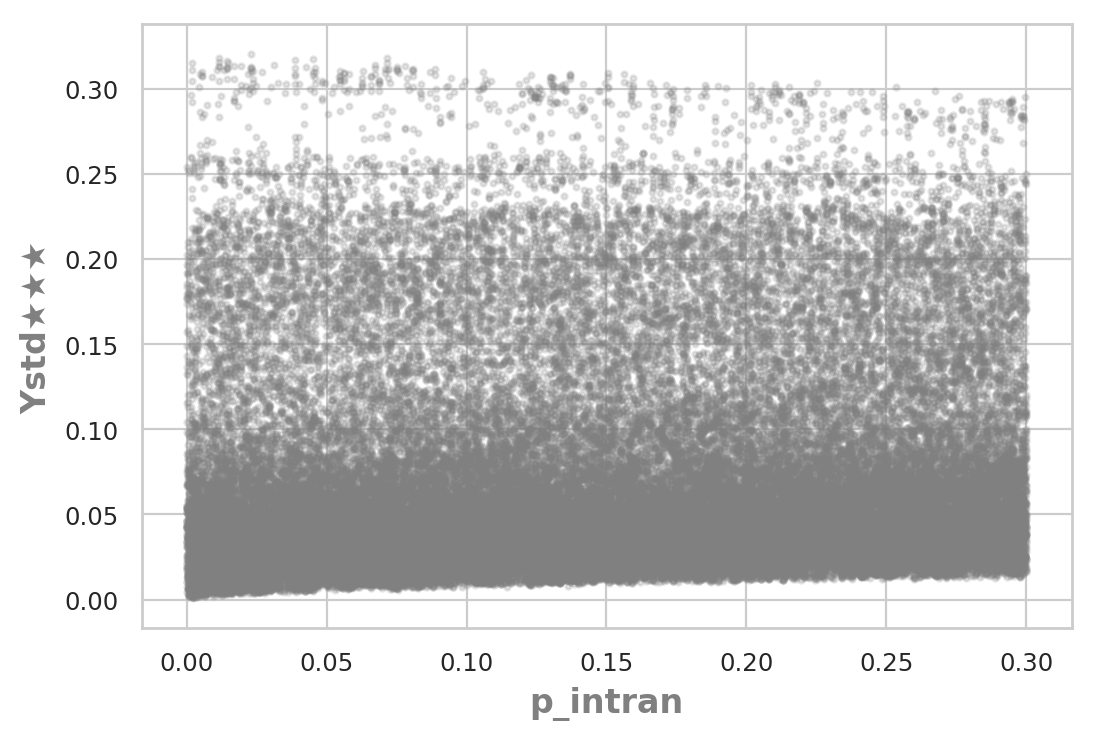

In [20]:
dfregplots(df_5k6params, "Ystd★", "Ystd*")
dfregplots(df_5k6params, "Ystd★★", "Ystd**")
dfregplots(df_5k6params, "Ystd★★★", "Ystd***")